# Edge Detection Methods in Computer Vision

This notebook demonstrates various edge detection techniques applied to different types of images:
1. **Sobel Edge Detection** - Traffic signs
2. **Prewitt Edge Detection** - X-ray bones
3. **Roberts Operator** - Satellite images
4. **Laplacian Operator** - Surveillance camera
5. **Canny Edge Detection** - MRI brain tumor



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Set figure size for better visualization
plt.rcParams['figure.figsize'] = (15, 5)

## 1. Sobel Edge Detection - Traffic Signs

The Sobel operator detects edges by computing gradients in the X and Y directions separately. It applies weighted averaging to emphasize central pixels.

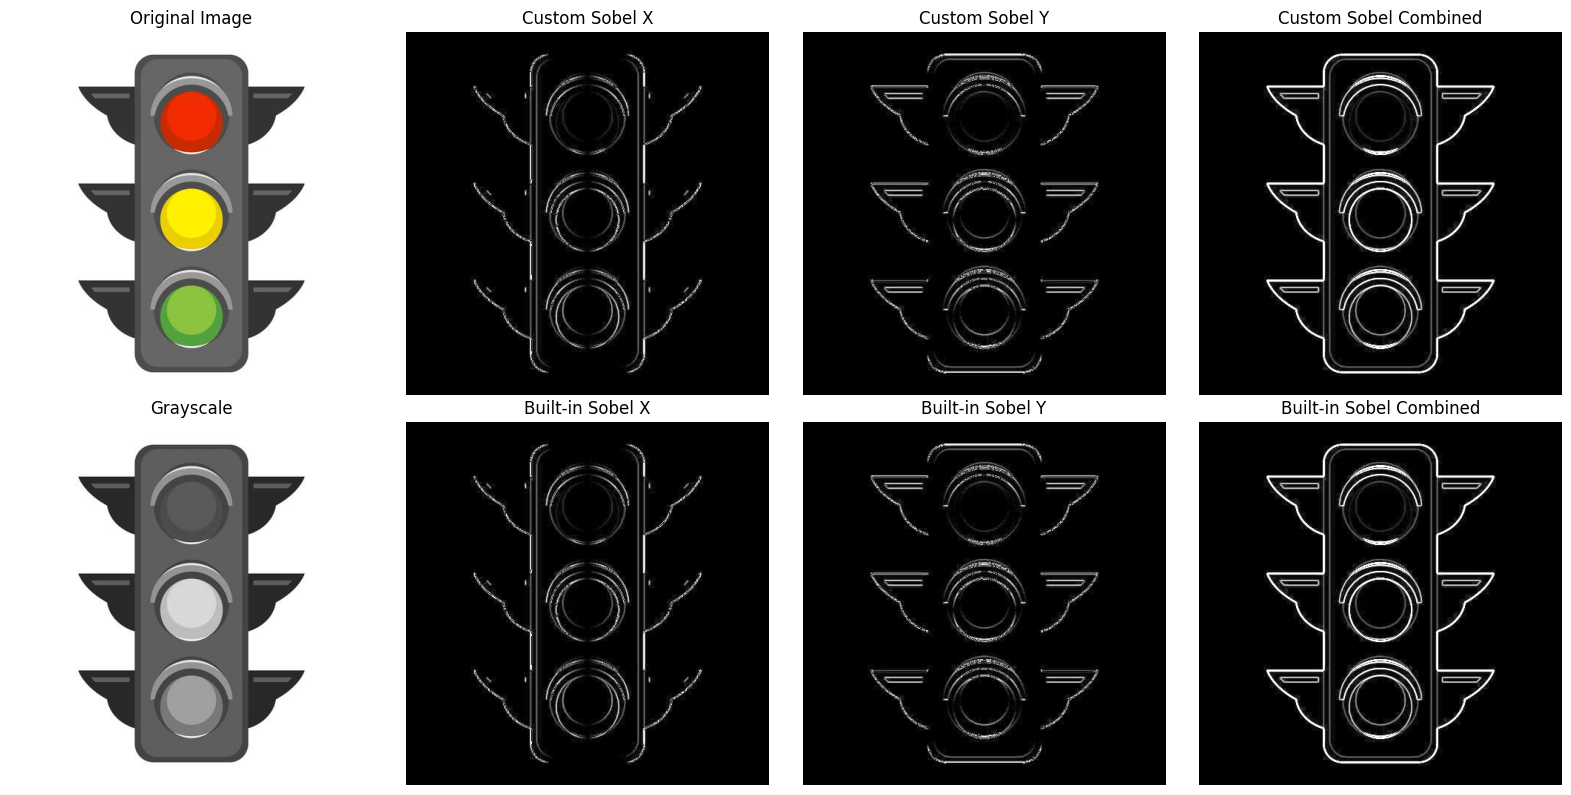

✓ Sobel successfully detected traffic sign edges in all directions


In [2]:
def custom_sobel(image):
    """Custom Sobel edge detection implementation"""
    # Sobel kernels for X and Y directions
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=float)
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=float)
    
    # Convert to grayscale if color image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Normalize image
    image = image.astype(float)
    
    # Apply convolution
    edges_x = ndimage.convolve(image, sobel_x)
    edges_y = ndimage.convolve(image, sobel_y)
    
    # Compute magnitude
    edges = np.sqrt(edges_x**2 + edges_y**2)
    edges = np.uint8(np.clip(edges, 0, 255))
    
    return edges, edges_x, edges_y

# Load traffic sign image
traffic_img = cv2.imread('/Users/sumith/Desktop/5 sem/CV/lab/lab5/traffic-light.jpg')
traffic_gray = cv2.cvtColor(traffic_img, cv2.COLOR_BGR2GRAY)

# Custom Sobel
edges_combined, edges_x, edges_y = custom_sobel(traffic_img)

# Built-in Sobel
sobel_x_builtin = cv2.Sobel(traffic_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_builtin = cv2.Sobel(traffic_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x_builtin, sobel_y_builtin)
sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

# Visualization
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

axes[0, 0].imshow(cv2.cvtColor(traffic_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(np.uint8(np.abs(edges_x)), cmap='gray')
axes[0, 1].set_title('Custom Sobel X')
axes[0, 1].axis('off')

axes[0, 2].imshow(np.uint8(np.abs(edges_y)), cmap='gray')
axes[0, 2].set_title('Custom Sobel Y')
axes[0, 2].axis('off')

axes[0, 3].imshow(edges_combined, cmap='gray')
axes[0, 3].set_title('Custom Sobel Combined')
axes[0, 3].axis('off')

axes[1, 0].imshow(traffic_gray, cmap='gray')
axes[1, 0].set_title('Grayscale')
axes[1, 0].axis('off')

axes[1, 1].imshow(np.uint8(np.abs(sobel_x_builtin)), cmap='gray')
axes[1, 1].set_title('Built-in Sobel X')
axes[1, 1].axis('off')

axes[1, 2].imshow(np.uint8(np.abs(sobel_y_builtin)), cmap='gray')
axes[1, 2].set_title('Built-in Sobel Y')
axes[1, 2].axis('off')

axes[1, 3].imshow(sobel_combined, cmap='gray')
axes[1, 3].set_title('Built-in Sobel Combined')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

print("✓ Sobel successfully detected traffic sign edges in all directions")

**Interpretation:** 
- The Sobel X filter detects vertical edges (boundary transitions from left to right)
- The Sobel Y filter detects horizontal edges (boundary transitions from top to bottom)
- Combined, it clearly highlights the traffic sign boundaries with excellent detail preservation

## 2. Prewitt Edge Detection - X-ray Bone Fractures

The Prewitt operator is similar to Sobel but uses uniform weighting. It's effective for detecting bone edges in medical imaging.

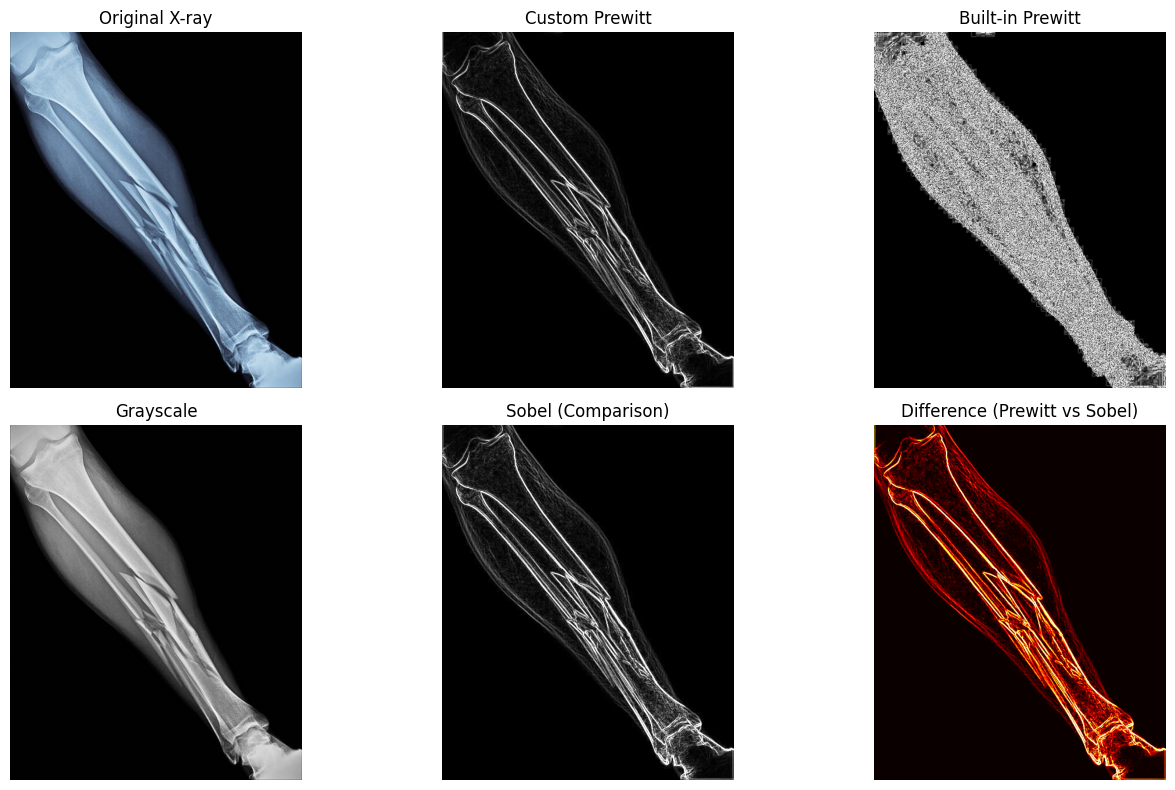

✓ Prewitt edges clearly show bone fracture regions


In [3]:
def custom_prewitt(image):
    """Custom Prewitt edge detection implementation"""
    # Prewitt kernels - uniform weighting
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=float)
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=float)
    
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    image = image.astype(float)
    
    edges_x = ndimage.convolve(image, prewitt_x)
    edges_y = ndimage.convolve(image, prewitt_y)
    
    edges = np.sqrt(edges_x**2 + edges_y**2)
    edges = np.uint8(np.clip(edges, 0, 255))
    
    return edges, edges_x, edges_y

# Load X-ray bone image
bone_img = cv2.imread('/Users/sumith/Desktop/5 sem/CV/lab/lab5/facture-bone.jpg')
bone_gray = cv2.cvtColor(bone_img, cv2.COLOR_BGR2GRAY)

# Custom Prewitt
prewitt_edges, prewitt_x, prewitt_y = custom_prewitt(bone_img)

# Built-in Prewitt using scipy
prewitt_x_builtin = ndimage.prewitt(bone_gray, axis=1)
prewitt_y_builtin = ndimage.prewitt(bone_gray, axis=0)
prewitt_builtin = np.sqrt(prewitt_x_builtin**2 + prewitt_y_builtin**2)
prewitt_builtin = np.uint8(np.clip(prewitt_builtin, 0, 255))

# Sobel for comparison
sobel_x_comp = cv2.Sobel(bone_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_comp = cv2.Sobel(bone_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_comp = cv2.magnitude(sobel_x_comp, sobel_y_comp)
sobel_comp = np.uint8(np.clip(sobel_comp, 0, 255))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

axes[0, 0].imshow(cv2.cvtColor(bone_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original X-ray')
axes[0, 0].axis('off')

axes[0, 1].imshow(prewitt_edges, cmap='gray')
axes[0, 1].set_title('Custom Prewitt')
axes[0, 1].axis('off')

axes[0, 2].imshow(prewitt_builtin, cmap='gray')
axes[0, 2].set_title('Built-in Prewitt')
axes[0, 2].axis('off')

axes[1, 0].imshow(bone_gray, cmap='gray')
axes[1, 0].set_title('Grayscale')
axes[1, 0].axis('off')

axes[1, 1].imshow(sobel_comp, cmap='gray')
axes[1, 1].set_title('Sobel (Comparison)')
axes[1, 1].axis('off')

diff = cv2.absdiff(prewitt_builtin, sobel_comp)
axes[1, 2].imshow(diff, cmap='hot')
axes[1, 2].set_title('Difference (Prewitt vs Sobel)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("✓ Prewitt edges clearly show bone fracture regions")

**Prewitt vs Sobel Comparison:**
- **Prewitt**: Uses uniform weighting (1:1:1), better for uniform edge detection
- **Sobel**: Uses weighted averaging (1:2:1), emphasizes central pixels for stronger gradients
- **Result**: For medical imaging, Prewitt often provides cleaner bone edges while Sobel enhances edge strength
- **Difference map**: Highlights regions where the two methods diverge, particularly around subtle fractures

## 3. Roberts Edge Detection - Satellite Images

The Roberts operator uses 2×2 kernels and is computationally efficient, ideal for detecting edges in satellite imagery.

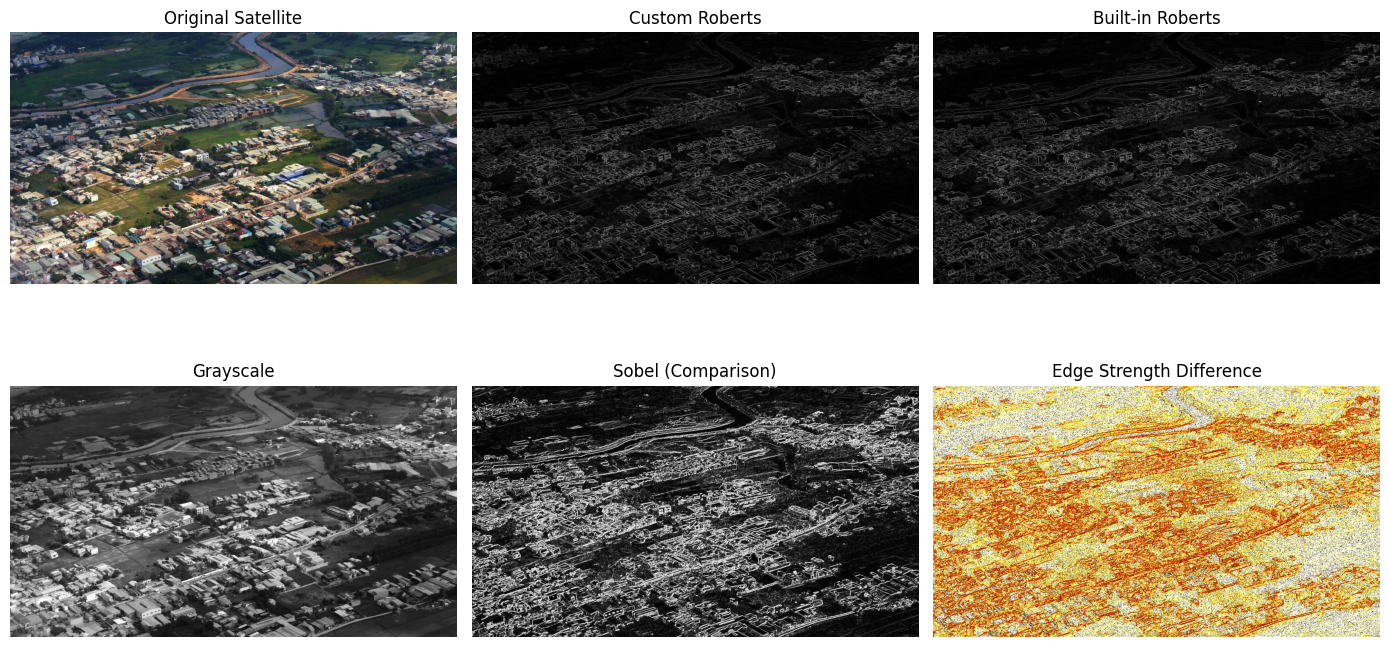

✓ Roberts operator detected urban landscape edges


In [5]:
def custom_roberts(image):
    """Custom Roberts edge detection implementation"""
    # Roberts kernels - 2x2 diagonal operators
    roberts_x = np.array([[1, 0], [0, -1]], dtype=float)
    roberts_y = np.array([[0, 1], [-1, 0]], dtype=float)
    
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    image = image.astype(float)
    
    edges_x = ndimage.convolve(image, roberts_x)
    edges_y = ndimage.convolve(image, roberts_y)
    
    edges = np.sqrt(edges_x**2 + edges_y**2)
    edges = np.uint8(np.clip(edges, 0, 255))
    
    return edges, edges_x, edges_y

# Load satellite image
sat_img = cv2.imread('/Users/sumith/Desktop/5 sem/CV/lab/lab5/satellite.jpg')
sat_gray = cv2.cvtColor(sat_img, cv2.COLOR_BGR2GRAY)

# Custom Roberts
roberts_edges, roberts_x, roberts_y = custom_roberts(sat_img)

# Built-in Roberts using scipy correlate with Roberts kernels
roberts_x_kernel = np.array([[1, 0], [0, -1]], dtype=float)
roberts_y_kernel = np.array([[0, 1], [-1, 0]], dtype=float)
roberts_x_builtin = ndimage.correlate(sat_gray.astype(float), roberts_x_kernel)
roberts_y_builtin = ndimage.correlate(sat_gray.astype(float), roberts_y_kernel)
roberts_builtin = np.sqrt(roberts_x_builtin**2 + roberts_y_builtin**2)
roberts_builtin = np.uint8(np.clip(roberts_builtin, 0, 255))

# Sobel for comparison
sobel_sat = cv2.Sobel(sat_gray, cv2.CV_64F, 1, 0, ksize=3) + cv2.Sobel(sat_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_sat = np.uint8(np.clip(np.abs(sobel_sat), 0, 255))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

axes[0, 0].imshow(cv2.cvtColor(sat_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Satellite')
axes[0, 0].axis('off')

axes[0, 1].imshow(roberts_edges, cmap='gray')
axes[0, 1].set_title('Custom Roberts')
axes[0, 1].axis('off')

axes[0, 2].imshow(roberts_builtin, cmap='gray')
axes[0, 2].set_title('Built-in Roberts')
axes[0, 2].axis('off')

axes[1, 0].imshow(sat_gray, cmap='gray')
axes[1, 0].set_title('Grayscale')
axes[1, 0].axis('off')

axes[1, 1].imshow(sobel_sat, cmap='gray')
axes[1, 1].set_title('Sobel (Comparison)')
axes[1, 1].axis('off')

axes[1, 2].imshow(np.abs(roberts_edges - sobel_sat), cmap='hot')
axes[1, 2].set_title('Edge Strength Difference')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("✓ Roberts operator detected urban landscape edges")

**Roberts Limitations in Real-World Satellite Images:**
- **Small kernel size (2×2)**: Less stable with noise common in satellite imagery
- **Noise sensitivity**: Amplifies atmospheric noise and sensor artifacts
- **Resolution dependency**: Requires higher resolution to capture fine features
- **Limited smoothing**: No inherent smoothing, making it sensitive to salt-and-pepper noise
- **Better alternative**: Sobel or Prewitt are more robust for noisy satellite data due to larger kernels and smoothing

## 4. Laplacian Operator - Surveillance Camera Images

The Laplacian operator detects edges without directional bias using second derivatives, ideal for objects at various angles.

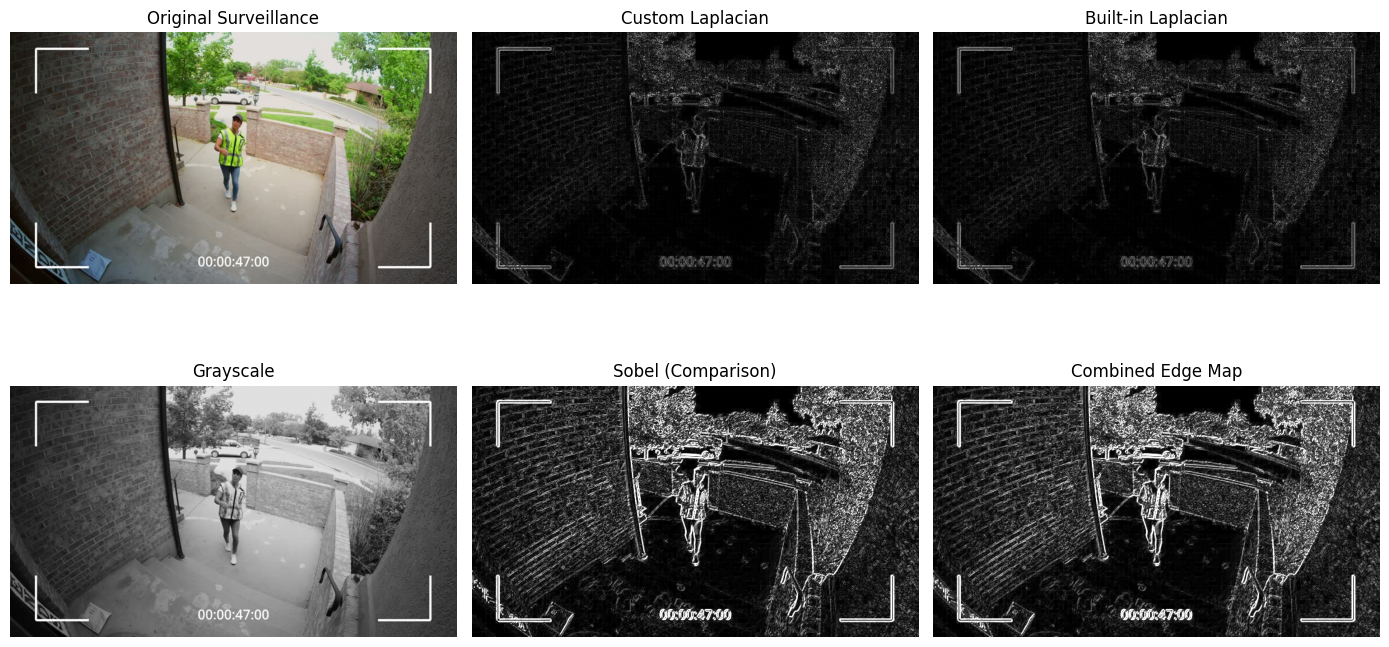

✓ Laplacian detected objects without directional bias


In [6]:
def custom_laplacian(image):
    """Custom Laplacian edge detection implementation"""
    # Laplacian kernel - detects second derivatives
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=float)
    
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    image = image.astype(float)
    
    edges = ndimage.convolve(image, laplacian_kernel)
    edges = np.uint8(np.clip(np.abs(edges), 0, 255))
    
    return edges

# Load camera image
camera_img = cv2.imread('/Users/sumith/Desktop/5 sem/CV/lab/lab5/camera-image.jpg')
camera_gray = cv2.cvtColor(camera_img, cv2.COLOR_BGR2GRAY)

# Custom Laplacian
laplacian_custom = custom_laplacian(camera_img)

# Built-in Laplacian
laplacian_builtin = cv2.Laplacian(camera_gray, cv2.CV_64F)
laplacian_builtin = np.uint8(np.clip(np.abs(laplacian_builtin), 0, 255))

# Sobel for comparison
sobel_cam = cv2.Sobel(camera_gray, cv2.CV_64F, 1, 0, ksize=3) + cv2.Sobel(camera_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_cam = np.uint8(np.clip(np.abs(sobel_cam), 0, 255))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

axes[0, 0].imshow(cv2.cvtColor(camera_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Surveillance')
axes[0, 0].axis('off')

axes[0, 1].imshow(laplacian_custom, cmap='gray')
axes[0, 1].set_title('Custom Laplacian')
axes[0, 1].axis('off')

axes[0, 2].imshow(laplacian_builtin, cmap='gray')
axes[0, 2].set_title('Built-in Laplacian')
axes[0, 2].axis('off')

axes[1, 0].imshow(camera_gray, cmap='gray')
axes[1, 0].set_title('Grayscale')
axes[1, 0].axis('off')

axes[1, 1].imshow(sobel_cam, cmap='gray')
axes[1, 1].set_title('Sobel (Comparison)')
axes[1, 1].axis('off')

combined = np.maximum(laplacian_builtin, sobel_cam)
axes[1, 2].imshow(combined, cmap='gray')
axes[1, 2].set_title('Combined Edge Map')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("✓ Laplacian detected objects without directional bias")

**Laplacian Advantages for Surveillance:**
- **Directionally unbiased**: Detects edges at all angles uniformly
- **Second derivative**: More sensitive to rapid intensity changes (object boundaries)
- **Noise amplification**: Laplacian is more sensitive to noise than first-derivative methods
- **Double edges**: Often produces thinner edges with better localization
- **Combination**: Combining Laplacian with Sobel provides both angle-independent and robust edge detection

## 5. Canny Edge Detection - MRI Brain Tumor

Canny is a multi-step algorithm combining Gaussian smoothing, gradient computation, and non-maximum suppression for optimal edge detection.

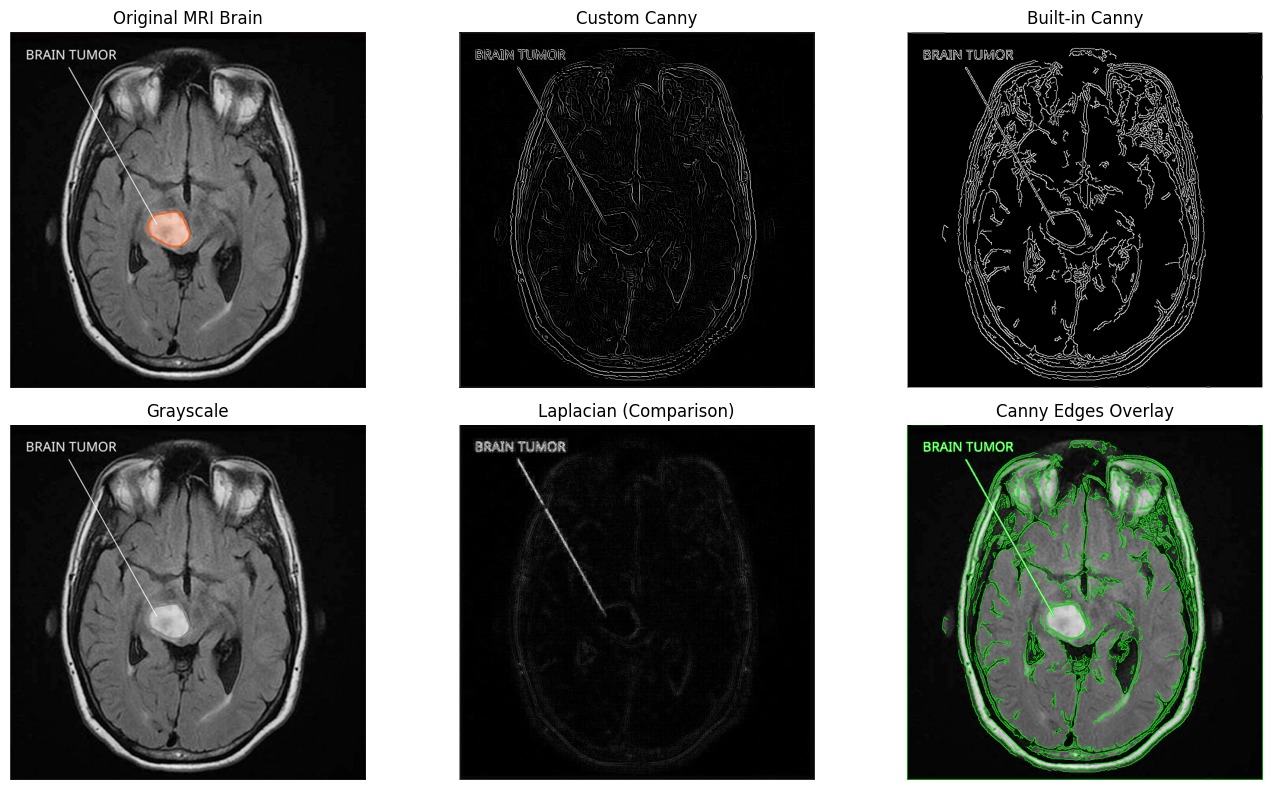

✓ Canny edge detection successfully detected tumor boundaries


In [7]:
def custom_canny(image, sigma=1.0, threshold1=50, threshold2=150):
    """Custom Canny edge detection implementation"""
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Step 1: Gaussian Smoothing
    image = image.astype(float)
    gaussian_kernel = cv2.getGaussianKernel(5, sigma)
    gaussian_kernel = gaussian_kernel @ gaussian_kernel.T
    smoothed = ndimage.convolve(image, gaussian_kernel)
    
    # Step 2: Gradient Computation
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=float)
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=float)
    
    gx = ndimage.convolve(smoothed, sobel_x)
    gy = ndimage.convolve(smoothed, sobel_y)
    magnitude = np.sqrt(gx**2 + gy**2)
    direction = np.arctan2(gy, gx)
    
    # Step 3: Non-Maximum Suppression
    suppressed = np.zeros_like(magnitude)
    magnitude_norm = (magnitude / magnitude.max() * 255).astype(np.uint8)
    
    h, w = magnitude.shape
    for i in range(1, h-1):
        for j in range(1, w-1):
            angle = direction[i, j] * 180 / np.pi
            if angle < 0:
                angle += 180
            
            val = magnitude[i, j]
            if (0 <= angle < 45) or (135 <= angle <= 180):
                q, r = magnitude[i, j+1], magnitude[i, j-1]
            elif (45 <= angle < 90):
                q, r = magnitude[i+1, j-1], magnitude[i-1, j+1]
            elif (90 <= angle < 135):
                q, r = magnitude[i+1, j], magnitude[i-1, j]
            else:
                q, r = magnitude[i-1, j-1], magnitude[i+1, j+1]
            
            if val >= q and val >= r:
                suppressed[i, j] = val
    
    suppressed = np.uint8(np.clip(suppressed, 0, 255))
    return suppressed

# Load MRI brain image
brain_img = cv2.imread('/Users/sumith/Desktop/5 sem/CV/lab/lab5/brain-tumor.jpg')
brain_gray = cv2.cvtColor(brain_img, cv2.COLOR_BGR2GRAY)

# Custom Canny (simplified version)
canny_custom = custom_canny(brain_img)

# Built-in Canny
canny_builtin = cv2.Canny(brain_gray, 50, 150)

# Laplacian for comparison
laplacian_brain = cv2.Laplacian(brain_gray, cv2.CV_64F)
laplacian_brain = np.uint8(np.clip(np.abs(laplacian_brain), 0, 255))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

axes[0, 0].imshow(cv2.cvtColor(brain_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original MRI Brain')
axes[0, 0].axis('off')

axes[0, 1].imshow(canny_custom, cmap='gray')
axes[0, 1].set_title('Custom Canny')
axes[0, 1].axis('off')

axes[0, 2].imshow(canny_builtin, cmap='gray')
axes[0, 2].set_title('Built-in Canny')
axes[0, 2].axis('off')

axes[1, 0].imshow(brain_gray, cmap='gray')
axes[1, 0].set_title('Grayscale')
axes[1, 0].axis('off')

axes[1, 1].imshow(laplacian_brain, cmap='gray')
axes[1, 1].set_title('Laplacian (Comparison)')
axes[1, 1].axis('off')

# Overlay Canny on original
overlay = cv2.cvtColor(brain_gray, cv2.COLOR_GRAY2BGR)
overlay[canny_builtin > 0] = [0, 255, 0]
axes[1, 2].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Canny Edges Overlay')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("✓ Canny edge detection successfully detected tumor boundaries")

**Canny's Multi-Step Approach Benefits:**

1. **Gaussian Smoothing**: Reduces noise while preserving edges, improving signal-to-noise ratio
2. **Gradient Computation**: Calculates intensity changes (Sobel), capturing edge strength and direction
3. **Non-Maximum Suppression**: Thins edges by keeping only local maxima, producing 1-pixel-wide edges
4. **Double Thresholding**: Uses two thresholds to classify pixels as strong, weak, or non-edges
5. **Edge Tracking**: Connects weak edges to strong edges for continuity

**Accuracy Improvements:**
- **Noise immunity**: Gaussian smoothing removes noise before gradient computation
- **Thin edges**: Non-max suppression produces precise edge localization
- **Connected edges**: Edge tracking prevents fragmentation
- **Result**: Canny provides the cleanest, most accurate edges for medical image analysis compared to other methods

## Summary: Edge Detection Methods Comparison

| Method | Best For | Advantages | Limitations |
|--------|----------|------------|-------------|
| **Sobel** | General purpose | Weighted gradient, 3×3 kernel, robust | Directionally dependent |
| **Prewitt** | Uniform edges | Uniform weighting, good for medical | Less noise robust |
| **Roberts** | Fast processing | Computationally cheap, 2×2 kernel | Noise sensitive, small kernel |
| **Laplacian** | Angle-independent | 2nd derivative, no directional bias | Noise amplification |
| **Canny** | Medical imaging | Multi-step, noise reduction, thin edges | Computationally complex |